# File for training sign language model.
# Use pickle.

In [1]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.activations import linear, relu, sigmoid

import matplotlib.pyplot as plt
from data import *


Folders_Found =  ['1', '2', 'A', 'B', 'C']
The shape of Images is: (25, 64, 64)
The shape of Labels is: (25,)


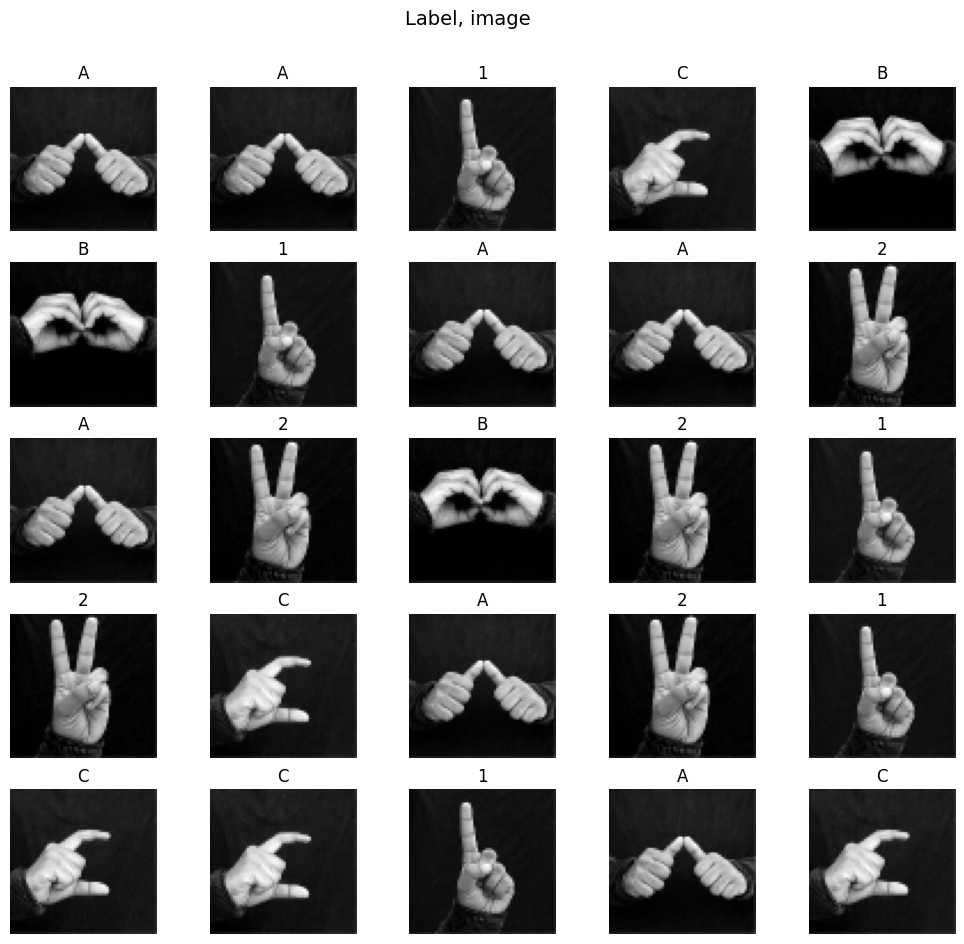

In [2]:
# Load Dataset

# For actual model
# DATASET_PATH = 'Dataset/Indian/'

# For testing purpose
DATASET_PATH = 'Miniset'

images, labels = load_data(DATASET_PATH)

print ('The shape of Images is: ' + str(images.shape))
print ('The shape of Labels is: ' + str(labels.shape))

show_random_dataset(images, labels)


In [3]:

# Set the dimension of images from (n, 64, 64) to (n, 64 * 64)
# For more efficient computation
images   = unroll_matrix(images)

# Encode the labels
# Labels  = ['0', '1', ... , '9', 'A', 'B', .... ,'Y', 'Z']
# Encoded = [ 0,   1, ....,   9,   10,  11, ....,  34,  35]
y_labels = encode_labels(labels)

print("New shape for images = ", images.shape)



New shape for images =  (25, 4096)


In [ ]:
# Setting up the model parameters


tf.random.set_seed(1234) # for consistent results

model = Sequential(
    [
        tf.keras.Input(shape=(4096, )),  # To be adjusted for inputs
        Dense(60, activation='relu'),
        Dense(45, activation='relu'),
        Dense(36, activation='linear')

    ], name = "sign_recognition_model" 
)


model.summary()


In [ ]:
# Compiling and training the model

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

history = model.fit(
    images, y_labels,
    epochs=10
)

model.save('isl_model.h5')

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = images.shape

fig, axes = plt.subplots(5, 5, figsize=(10,10))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = images[random_index].reshape(64, 64)
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(images[random_index].reshape(1,4096))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)

    # Display the label above the image
    ax.set_title(f"{labels[random_index]},{yhat}",fontsize=10)
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=14)
plt.show()